# Diabetic Retinopathy Detection model
This notebook shows how you can use SageMaker Python API to do the following:
 * deploy our model to create an endpoint
 * run Real Time inference on endpoint using local image
 * visualize  and save the prediction on original image

### 1. Start the trial or buy our VitechLab Retinopathy Detection model on AWS Marketplace

You can find our model here: https://aws.amazon.com/marketplace/pp/prodview-b53upp27dnmzq

### 2. Initializing a model using AWS SageMaker Python API

In [1]:
import glob
import os
from os import path
import json

import sagemaker as sage
from sagemaker import get_execution_role

from utils import get_model_package_arn

In [2]:
sess = sage.Session()
role = get_execution_role()

In [3]:
model_package_arn = get_model_package_arn(sess.boto_region_name)

model = sage.ModelPackage(
    role=role,
    model_package_arn=model_package_arn)

### 3. Generating Prediction using `RealTimePredictor`

#### Creating a new endpoint

In [4]:
endpoint_name='diabetic-retinopathy-model-example-endpoint'

model.deploy(initial_instance_count=1, instance_type='ml.m4.2xlarge', endpoint_name=endpoint_name)

-------------------------------------------------------------------------------------------------!

In [5]:
predictor = sage.predictor.RealTimePredictor(
    endpoint_name,
    sagemaker_session=sess, 
    content_type="image/jpeg"
)

## Generating predictions

In [29]:
import glob
from PIL import Image
from IPython.display import display

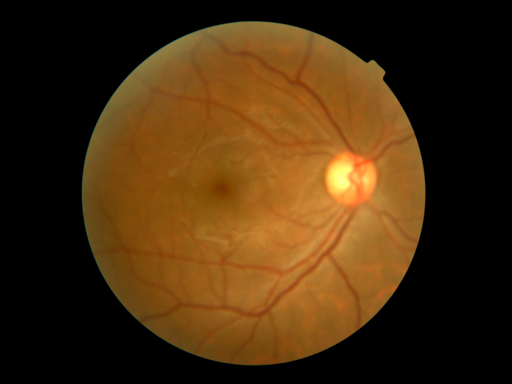

image 0: sample_data\level-0 (99c626e58464).png
prediction result: {"classification_result": 0, "classification_score": 0.013177767395973206}

---



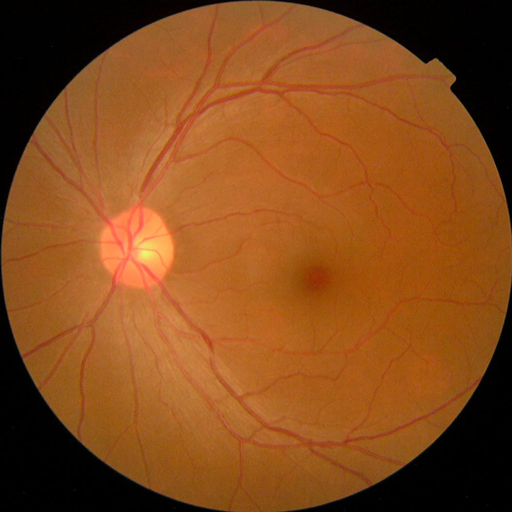

image 1: sample_data\level-0 (f4df3d86688d).png
prediction result: {"classification_result": 0, "classification_score": -0.026402711868286133}

---



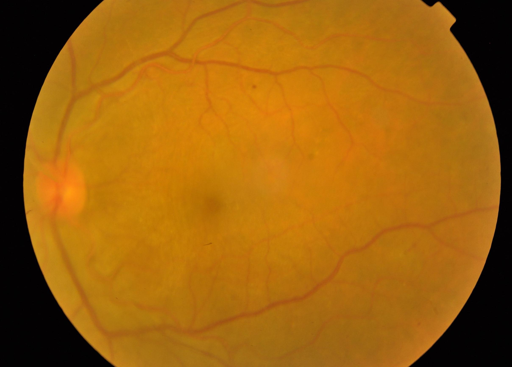

image 2: sample_data\level-1 (58184d6fd087).png
prediction result: {"classification_result": 1, "classification_score": 1.4198755025863647}

---



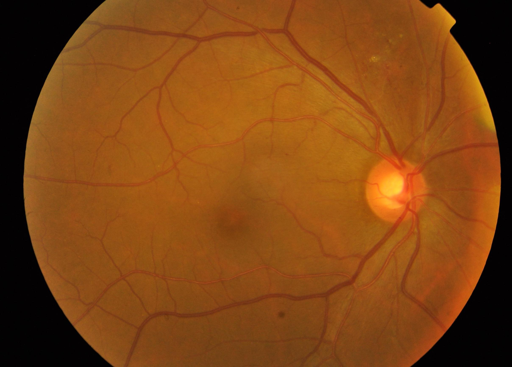

image 3: sample_data\level-1 (a5a2a7003d60).png
prediction result: {"classification_result": 2, "classification_score": 1.726229190826416}

---



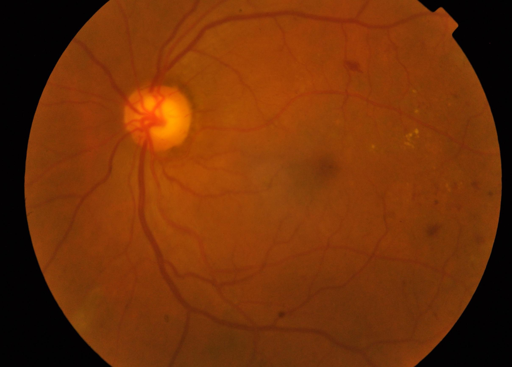

image 4: sample_data\level-2 (3cdda8b3df19).png
prediction result: {"classification_result": 2, "classification_score": 2.3080241680145264}

---



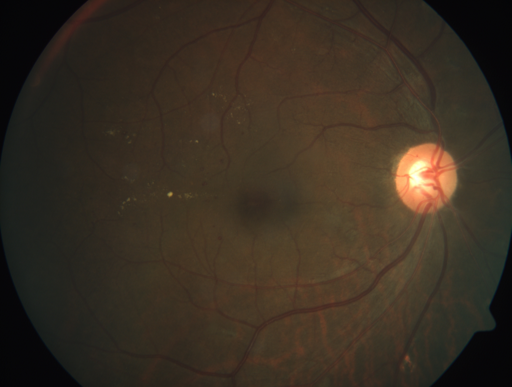

image 5: sample_data\level-2 (663a923d5398).png
prediction result: {"classification_result": 2, "classification_score": 1.8968541622161865}

---



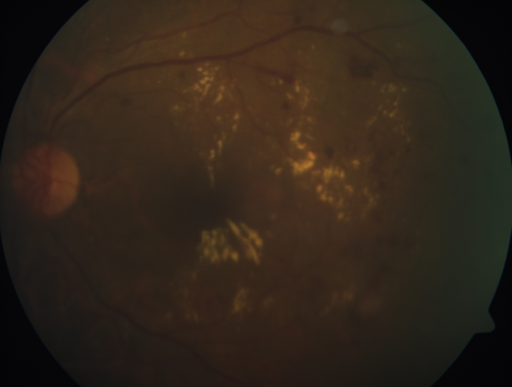

image 6: sample_data\level-3 (b191ba0a2b12).png
prediction result: {"classification_result": 3, "classification_score": 3.1491851806640625}

---



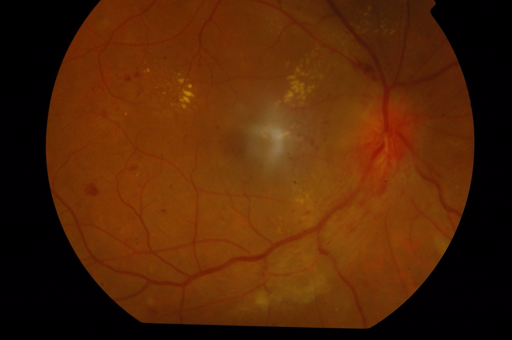

image 7: sample_data\level-3 (fe0fc67c7980).png
prediction result: {"classification_result": 3, "classification_score": 2.7302095890045166}

---



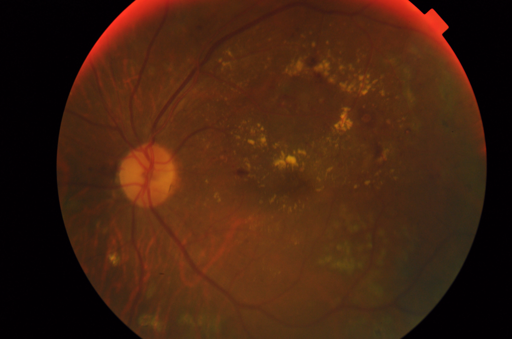

image 8: sample_data\level-4 (034cb07a550f).png
prediction result: {"classification_result": 4, "classification_score": 4.115696907043457}

---



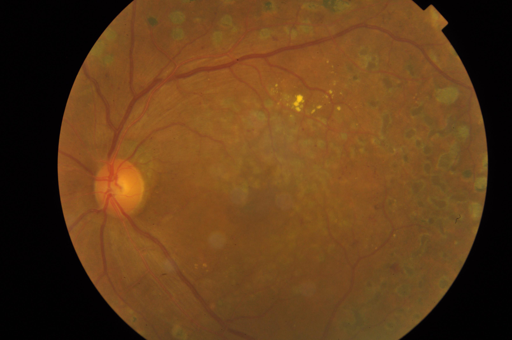

image 9: sample_data\level-4 (f2d2a0c92034).png
prediction result: {"classification_result": 4, "classification_score": 4.050225257873535}

---



In [36]:
image_files = sorted(glob.glob('sample_data/*.png'))

for i, image_path in enumerate(image_files):
    img = Image.open(image_path)
    img.thumbnail((512,512))
    display(img)
    
    print(f'image {i}: {image_path}')
    
    with open(image_path, 'rb') as image:
        f = image.read()
        image_bytes = bytearray(f)

    prediction_result = predictor.predict(image_bytes).decode("utf-8")
    
    print('prediction result:', prediction_result)
    print('\n---\n')

### Delete the Endpoint
Having an endpoint running will incur some costs. Therefore as a clean-up job, we should delete the endpoint.

In [10]:
sess.delete_endpoint(predictor.endpoint)